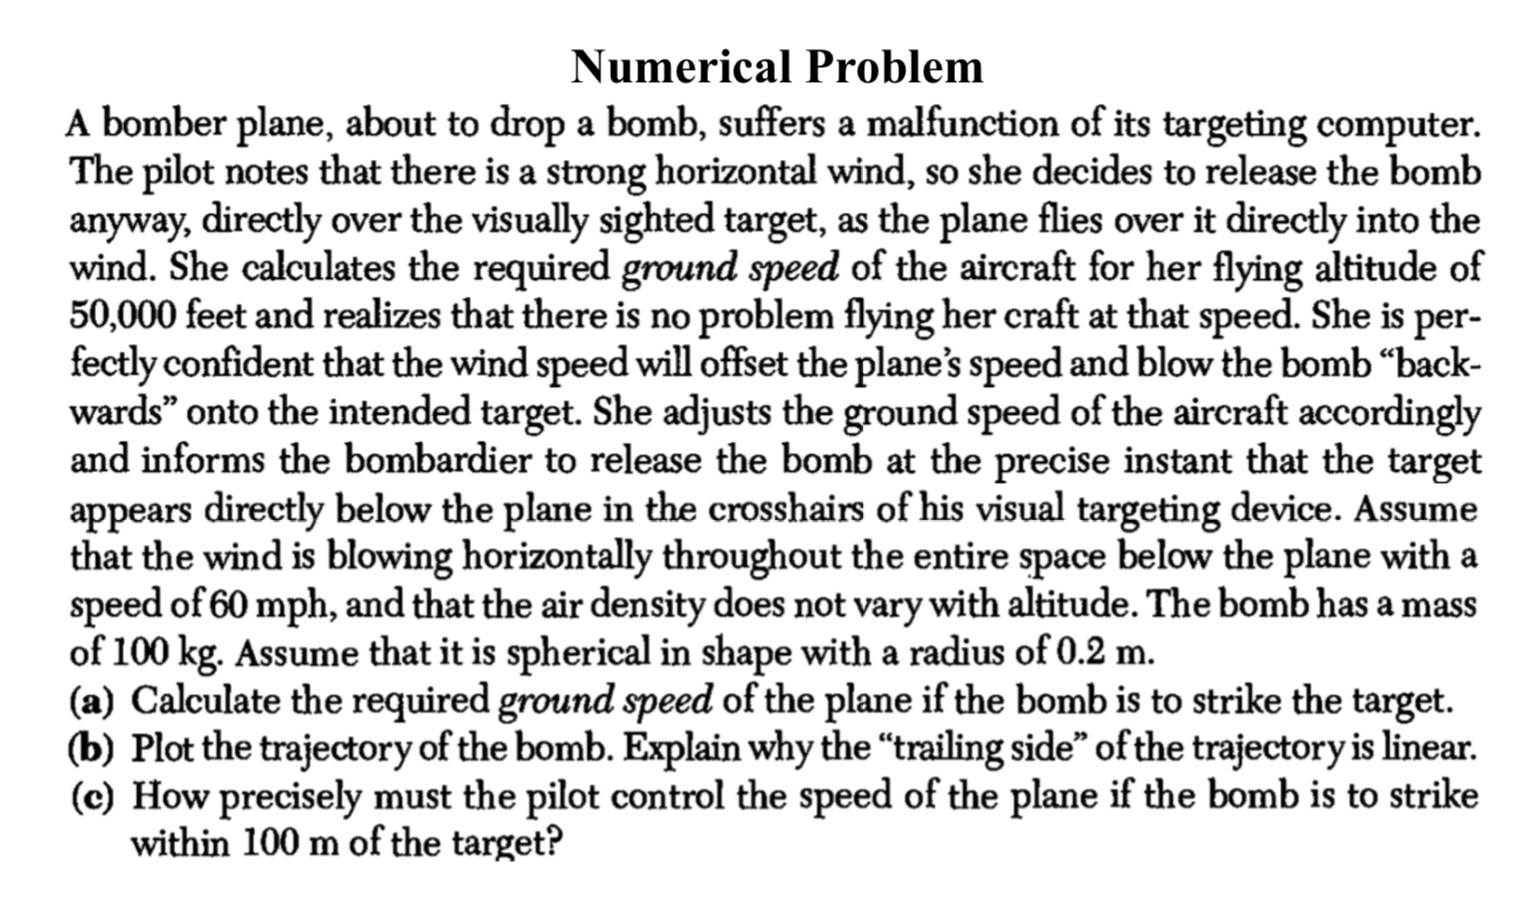

In [1]:
from IPython.display import Image
Image('NA3.png', width=800, height=700)

In [2]:
%pylab ipympl

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy.integrate import odeint

### Initital Conditions

In [4]:
R = 0.2 # radius of the bomb in m
m = 100 # mass of the bomb in kg
h = 50000 * 0.3048 # initial height in m
vw = 60 * 0.44704 # wind speed in m/s (in the opposite direction as the plane)
ag = -9.8 # acceleration due to gravity in m/s^2 I will assume constant first then fix 

In [5]:
A = pi*(R**2) #cross-sectional area of the bomb in m^2
Cd = 0.47  # the dimensionless air-drag coefficient for a sphere
rhoa = 1.  # the air density (in kg/m**3)
c2 = 0.5*Cd*rhoa*A
b = -c2/m

### Coordinates and Setup

Let the x-axis be parallel to the velocity of the bomber plane.  Assume the plane is flying parallel to the ground, such that the ground is also assumed to be horizontal.   

Let the y-axis be through the target, such that the target is at x=0.  Let y=0 correspond to ground level / the vertical location of the target.

From Newton's Second Law:
$$\frac{d\mathbf{p}}{dt} = m\frac{d\mathbf{v}}{dt} = \mathbf{F} = \mathbf{F}_\mathrm{g} + \mathbf{F}_\mathrm{d} = m\mathbf{g} - \frac{1}{2}C_\mathrm{d}\rho_\mathrm{a}A\mathbf{v}_\mathrm{ba}\,
|\mathbf{v}_\mathrm{ba}|$$

$$  m  \frac{d\mathbf{v}}{dt} = m\mathbf{g} - c_2 \mathbf{v}_\mathrm{ba}\,
|\mathbf{v}_\mathrm{ba}| $$


$\mathbf{v}_\mathrm{ba} = \mathbf{v}-\mathbf{v}_\mathrm{w}$ is the velocity of the bomb relative to the air.

The wind velocity $\mathbf{v}_\mathrm{w} = -v_\mathrm{w}\mathbf{e}_x$

Let y be the vertical position of the bomb

In the vertical direction we have:
$$
m\ddot{y} = -mg - c_2\dot{y}\,\sqrt{(\dot{x}+v_\mathrm{w})^2+\dot{y}^2},\\
$$

Let x be the horizontal position of the bomb

In the horizontal direction we have:
$$
m\ddot{x} = - c_2(\dot{x}+v_\mathrm{w})\,\sqrt{(\dot{x}+v_\mathrm{w})^2+\dot{y}^2}$$


Let $y_1 = x$, $y_3 = y$, $a = -g$, and $b=-\frac{c_2}{m}$


$$
\dot{y_1} = y_2,\\ \ \
\dot{y_2} = b(y_2+v_\mathrm{w})\sqrt{(y_2+v_\mathrm{w})^2+y_4^2},\\
\dot{y_3} = y_4,\\ \ \
\dot{y_4} = a + by_4\sqrt{(y_2+v_\mathrm{w})^2+y_4^2},\\
$$


We are assuming that the air density does not change with altitude

In [18]:
# the function defining the right-hand sides of the ODEs
def dy_dt(y, t, a, b, vw):
    ''' y = [ y1, y2,  y3, y4 ]
        y = [ x , v_x, y,  v_y ]    
    Returns 
    dydt = [ v_x, a_x , v_y , a_y ]
    '''
    y1, y2, y3, y4 = y
    dydt = [y2, b*(y2+vw)*sqrt((y2+vw)**2 + y4**2), y4, 
            a + b*y4*sqrt((y2+vw)**2 + y4**2)]
    return dydt

In [7]:
# the integration time interval
t_start = 0.
t_end = 100. 
nt = 10000 
t = linspace(t_start, t_end, nt)

## Part (A)

In [8]:
#Initial positions and velocities 
#y0 = [ x0 , v_x0, y0,  v_y0 ] 
v = 80. # 80 m/s is my inital guess for the needed velocity of the plane 
y0 =  [ 0  ,  v   , h , 0 ]

In [9]:
sol = odeint(dy_dt, y0, t, args=(ag, b, vw))
#columns of sol are the results of the differentiation
x = sol[0:,0] #x position as a function of time
y = sol[0:,2] #y position as a function of time
v_x = sol[0:,1] #x velocity as a function of time
v_y = sol[0:,3] #y velocity as a function of time

In [10]:
from scipy.interpolate import interp1d

In [11]:
fx = interp1d(y[1:-1],x[1:-1])
print ("When the bomb hits the ground it will be {} m from the target when she flies at {} m/s relative to the ground".format(fx(0.),v))

When the bomb hits the ground it will be -0.062449015219493836 m from the target when she flies at 80.0 m/s relative to the ground


In [12]:
#Getting a more accurate speed the pilot needs to fly at 

vguess = linspace(80.003,80.004,1000)  

v0_inter = []
distance_inter = []
for ia in range (len(vguess)):

    v0 = vguess[ia]

    # the initial conditions
    y0 =  [ 0  ,  v0   , h , 0 ]

    # solve the ODEs
    sol = odeint(dy_dt, y0, t, args=(ag, b, vw))

    fx = interp1d(sol[1:-1,2],sol[1:-1,0])
    
    v0_inter.append(vguess[ia])
    distance_inter.append(abs(fx(0.)))
    
optv0 = v0_inter[where(distance_inter==min(distance_inter))[0][0]]
optd = min(distance_inter)
print('The pilot should fly at approx {} m/s relative to the ground for the bomb to hit within {}m of the target'.format(optv0,optd))

The pilot should fly at approx 80.00327027027028 m/s relative to the ground for the bomb to hit within 4.0657946054900584e-06m of the target


## Part (B)

In [13]:
%matplotlib inline

In [14]:
y02 =  [ 0  ,  optv0   , h , 0 ]
sol2 = odeint(dy_dt, y02, t, args=(ag, b, vw))
#columns of sol are the results of the differentiation
x2 = sol2[0:,0] #x position as a function of time
y2 = sol2[0:,2] #y position as a function of time
v_x2 = sol2[0:,1] #x velocity as a function of time
v_y2 = sol2[0:,3] #y velocity as a function of time

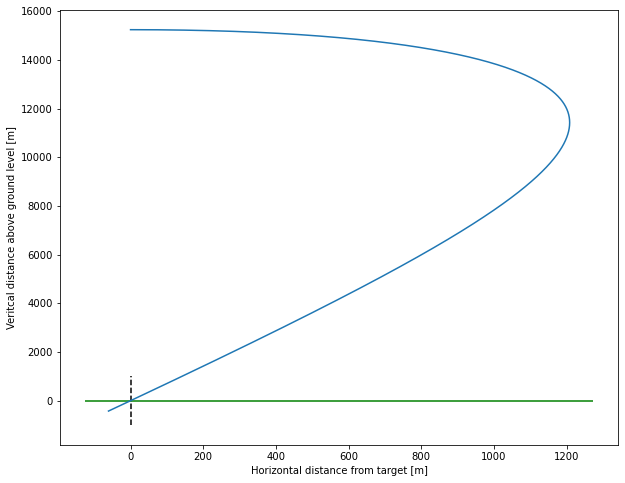

In [15]:
figure(1,figsize=[10,8])
plot(x2,y2)
xlabel('Horizontal distance from target [m]')
ylabel('Veritcal distance above ground level [m]')

axes = plt.gca()
xmin,xmax = axes.get_xlim()
hlines(0,xmin,xmax,color='green')
vlines(0,-1000,1000,color='black',linestyle='--')

If the "trailing end of the trajectory" is refering to the part of the trajectory after the bomb has turned around and is going backwards towards the target, then this section of the trajectory is linear meaning its y position is changing by equal increments and its x position is changing by equal increments. 

The "trailing end" of the trajectory is the section right before the bomb hits the ground.  The acceleration in this section is nearly zero in the x-direction and zero in the y-direction.  This would indicate that the forces on the bomb are balanced, or nearly so, meaning the air resistance is canceling the force from gravity and wind in their respective directions.  This would akin to terminal velocity.

The following plots help to illustrate this.
Note how as time goes on the acceleration goes to zero.  By Newton's second law, if the acceleration on an object is zero there is no net force the object.

Text(0.5, 1.0, 'y acceleration')

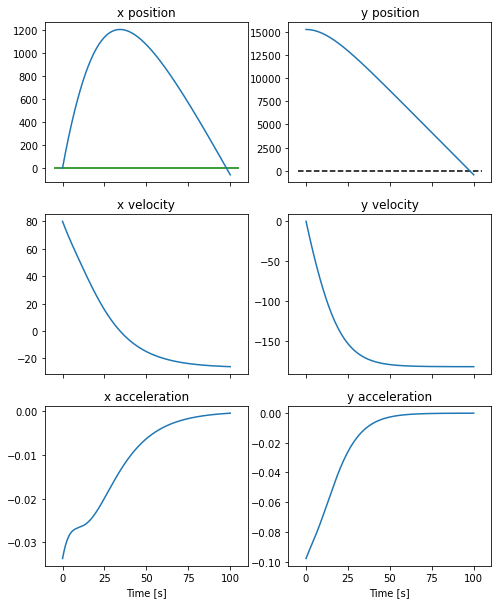

In [16]:
f, axs = plt.subplots(3, 2, sharex=True,figsize=[8,10])
axs[0,0].plot(t,x2)
axs[0,1].plot(t,y2)
axs[1,0].plot(t,v_x2)
axs[1,1].plot(t,v_y2)
axs[2,0].plot(t,gradient(v_x2))
axs[2,1].plot(t,gradient(v_y2))

ax_list = f.axes
xmin, xmax = ax_list[0].get_xlim()

axs[0,0].hlines(0,xmin,xmax,color='green')
axs[0,1].hlines(0,xmin,xmax,color='black',linestyle='--')

axs[2,0].set_xlabel('Time [s]')
axs[2,1].set_xlabel('Time [s]')

axs[0,0].set_title('x position')
axs[0,1].set_title('y position')
axs[1,0].set_title('x velocity')
axs[1,1].set_title('y velocity')
axs[2,0].set_title('x acceleration')
axs[2,1].set_title('y acceleration')
#vlines(0,-1000,1000,color='black',linestyle='--')

### Part (C)

In [17]:
#Getting a lower bound of the speed the pilot needs to fly at 
vguess_lb = linspace(70,80,500)  

v0_lb = []
lb = []
distance_lb = []
for ia in range (len(vguess_lb)):

    v0 = vguess_lb[ia]

    # the initial conditions
    y0 =  [ 0  ,  v0   , h , 0 ]

    # solve the ODEs
    sol = odeint(dy_dt, y0, t, args=(ag, b, vw))

    fx_lb = interp1d(sol[1:-1,2],sol[1:-1,0])
    
    distance_lb.append(fx_lb(0.))
    v0_lb.append(vguess_lb[ia])
    lb.append( abs(100 - abs(fx_lb(0.))) )
    
optv0_lb = v0_lb[ where( lb == min(lb))[0][0] ]
d_lb = distance_lb[ where( lb == min(lb))[0][0] ]
print('The pilot should fly at approx {:.5f} m/s relative to the ground for the bomb to hit within {:.5f} m of the target'.format(optv0_lb,d_lb))

#Getting an upper bound of the speed the pilot needs to fly at 
vguess_ub = linspace(80,90,500)  

v0_ub = []
ub = []
distance_ub = []
for ia in range (len(vguess_ub)):

    v0 = vguess_ub[ia]

    # the initial conditions
    y0 =  [ 0  ,  v0   , h , 0 ]

    # solve the ODEs
    sol = odeint(dy_dt, y0, t, args=(ag, b, vw))

    fx_ub = interp1d(sol[1:-1,2],sol[1:-1,0]) #what is the x position when the height is y?
    
    distance_ub.append(fx_ub(0.))
    v0_ub.append(vguess_ub[ia])
    ub.append( abs( 100 - abs(fx_ub(0.))) )
    
optv0_ub = v0_ub[ where( ub == min(ub))[0][0] ]
d_ub = distance_ub[ where( ub == min(ub))[0][0] ]
print('The pilot should fly at approx {:.5f} m/s relative to the ground for the bomb to hit within {:.5f} m of the target'.format(optv0_ub,d_ub))

The pilot should fly at approx 74.82966 m/s relative to the ground for the bomb to hit within -99.90890 m of the target
The pilot should fly at approx 85.29058 m/s relative to the ground for the bomb to hit within 99.81341 m of the target


The pilot needs to be able to control her speed to within approx 5m/s relative to the ground in order for the bomb to land within 100m of the target.

Any deviation from the required speed ($\approx$80.003 m/s) greater than $\approx$5m/s (ie speeds less than $\approx$75m/s or greater than $\approx$85m/s ) will result in the bomb landing more than $\approx$100m away from the taregt.